## 1. 데이터 양이 모델 성능에 미치는 영향

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Iris 데이터셋 로드
digits = load_digits()

full_data, x_test, full_target, y_test = train_test_split(
    digits.data, digits.target, train_size=0.8, shuffle=True, random_state=42)
part_data, _, part_target, _ = train_test_split(
    full_data, full_target, train_size=0.2, shuffle=False)

print(full_data.shape, part_data.shape)

# 분류기 성능 측정 함수
def train_and_evaluate(name, x, y):
    model = LogisticRegression(max_iter=200)
    model.fit(x, y)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    return name, acc

results = []
results.append(train_and_evaluate("full data", full_data, full_target))
results.append(train_and_evaluate("part data", part_data, part_target))

# 결과 정리
summary = pd.DataFrame([
    {
        "Case": name,
        "Accuracy": acc
    }
    for name, acc in results
])

summary

(1437, 64) (287, 64)


C:\Users\rando\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rando\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,Case,Accuracy
0,full data,0.975000
1,part data,0.933333


In [2]:
from collections import Counter

remove_indexes = []
for i, target in enumerate(full_target):
    if target in [7, 8, 9, 0]:
        remove_indexes.append(i)
    if len(remove_indexes) == 400:
        break

unbal_data, unbal_target = [], []
for i, (data, target) in enumerate(zip(full_data, full_target)):
    if i not in remove_indexes:
        unbal_data.append(data)
        unbal_target.append(target)
        
len(unbal_data)

1037

In [3]:
results.append(train_and_evaluate("unbalanced data", unbal_data, unbal_target))

C:\Users\rando\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
summary = pd.DataFrame([
    {
        "Case": name,
        "Accuracy": acc
    }
    for name, acc in results
])

summary

,Case,Accuracy
0,full data,0.975000
1,part data,0.933333
2,unbalanced data,0.944444


## train_test_split

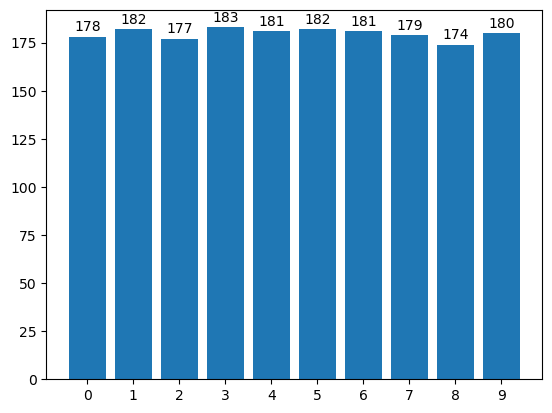

In [32]:
import matplotlib.pyplot as plt
from collections import Counter

cnt = Counter(digits.target)

plt.bar(range(10), cnt.values())
plt.xticks(range(10), cnt.keys())
# 막대 위에 텍스트 추가
for i, v in enumerate(cnt.values()):
    plt.text(i, v + 3, str(v), ha='center')  # y값 + 5만큼 위에 표시, 가운데 정렬

plt.show()

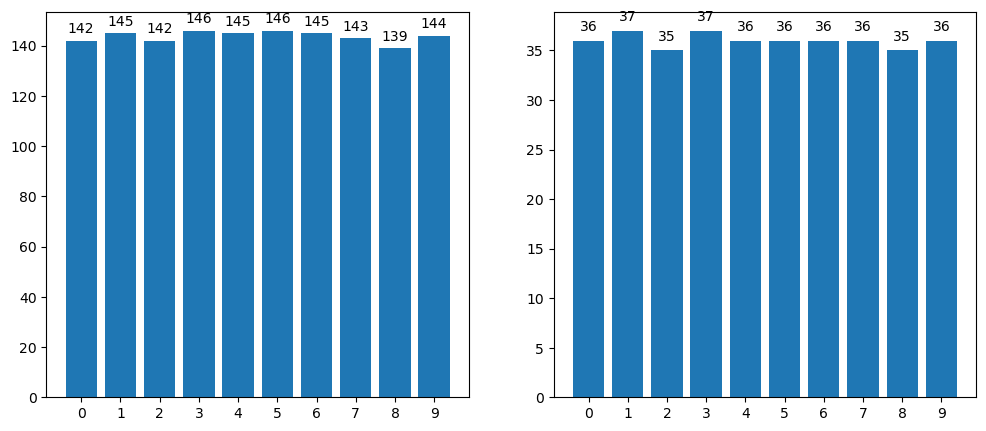

In [51]:
# stratify : 데이터 라벨 비율 유지.
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8, shuffle=True, stratify=digits.target)
train_cnt = Counter(y_train)
test_cnt = Counter(y_test)

train_cnt = dict(sorted(train_cnt.items()))
test_cnt = dict(sorted(test_cnt.items()))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].bar(range(10), train_cnt.values())
ax[0].set_xticks(range(10), train_cnt.keys())
# 막대 위에 텍스트 추가
for i, v in enumerate(train_cnt.values()):
    ax[0].text(i, v + 3, str(v), ha='center')  # y값 + 5만큼 위에 표시, 가운데 정렬

ax[1].bar(range(10), test_cnt.values())
ax[1].set_xticks(range(10), test_cnt.keys())
# 막대 위에 텍스트 추가
for i, v in enumerate(test_cnt.values()):
    ax[1].text(i, v+1, str(v), ha='center')  # y값 + 5만큼 위에 표시, 가운데 정렬

plt.show()

## 이상치 처리

In [76]:
import pandas as pd

df = pd.DataFrame({
    "Height": [170, 165, 180, 175, 160, 168, 172],
    "Weight": [70, 65, 80, 75, 55, 60, 68],
    "Age":[ 25.0, 30.0, 28.0, 22.0, -5.0, 32.5, 27.0]
})
df

,Height,Weight,Age
0,170,70,25.0
1,165,65,30.0
2,180,80,28.0
3,175,75,22.0
4,160,55,-5.0
5,168,60,32.5
6,172,68,27.0


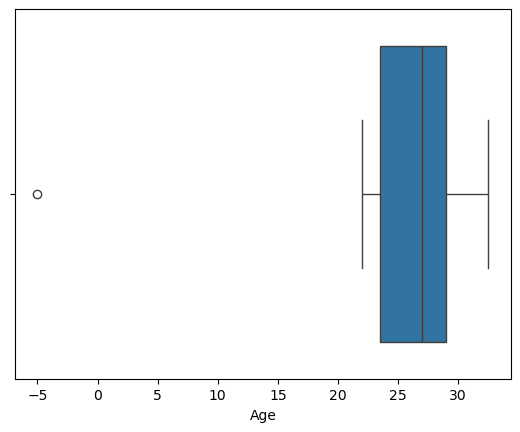

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Age'])
plt.xlabel('Age')
plt.show()

In [78]:
age_df = df[(df['Age'] > 0) & (df['Age'] == df['Age'].astype(int))]
age_df

,Height,Weight,Age
0,170,70,25.0
1,165,65,30.0
2,180,80,28.0
3,175,75,22.0
6,172,68,27.0


In [79]:
age_df = df
median_age = df[(df['Age'] > 0) & (df['Age'] == df['Age'].astype(int))]['Age'].median()

age_df['Age'] = age_df['Age'].apply(lambda x: median_age if x <= 0 or x != int(x) else x)
age_df

,Height,Weight,Age
0,170,70,25.0
1,165,65,30.0
2,180,80,28.0
3,175,75,22.0
4,160,55,27.0
5,168,60,27.0
6,172,68,27.0


In [83]:
df = pd.DataFrame({
    "Height": [170, 165, 180, 175, 160, 168, 172],
    "Weight": [70, 65, 80, 75, 55, 60, 68],
    "Age":[ 25.0, 30.0, 28.0, 22.0, -5.0, 32.5, 27.0]
})

def is_outlier(age):
    return age <= 0 or age != int(age)

df['Age_Outlier'] = df['Age'].apply(is_outlier)
df

,Height,Weight,Age,Age_Outlier
0,170,70,25.0,False
1,165,65,30.0,False
2,180,80,28.0,False
3,175,75,22.0,False
4,160,55,-5.0,True
5,168,60,32.5,True
6,172,68,27.0,False


In [87]:
data = {
    "Date": ["2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05"]
}

df = pd.DataFrame(data)
df

,Date
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05


In [91]:
df[['Year', 'Month', 'Day']] = df['Date'].str.split('-', expand=True)
df

,Date,Year,Month,Day
0,2023-01-01,2023,01,01
1,2023-01-02,2023,01,02
2,2023-01-03,2023,01,03
3,2023-01-04,2023,01,04
4,2023-01-05,2023,01,05
